In [1]:
#Import Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# actMath_11
- District: 45
- Year (Features): 2017
- Grades: 11
- Values / dataSource: actMath
- Features: \[fill]
- Num features: x
- Label: `proficient_score`
- Accuracy:
- F1: 
- Other metrics: 
- Notes:

In [2]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "actMath_11_encoded_df.csv")
actMath11_df = pd.read_csv(filename, header = 0)

In [3]:
actMath11_df.head()

,studentId,is_proficient,proficient_score,proficient_diff,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,...,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.53,-8.00,True,False,False,False,0,0,...,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.53,-8.00,True,False,False,False,0,0,...,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.94,-1.00,False,False,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.94,-1.00,False,False,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.94,-1.00,False,False,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
actMath11_df.columns

Index(['studentId', 'is_proficient', 'proficient_score', 'proficient_diff',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [5]:
#Create labeled examples from the dataset
#X = actMath11_df.drop(columns=['is_proficient', 'proficient_score', 'proficient_diff', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D'], inplace=False)
X = actMath11_df[['category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE']]
y = actMath11_df['proficient_score']

In [6]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [8]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.17
 R^2 =   0.25


Model Performance When I included all columns as features:
RMSE = 0.17
R^2 = 0.25

I got the same results above when I use only courses and only schools

Model Performance When only using vendors as features:
RMSE = 0.19
R^2 = -0.00

# Using New Dataframes Comparing Training on 2017 Proficiency with 2018 as Label

Math

In [9]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "mathProficiency2017-2018.csv")
math_df = pd.read_csv(filename, header = 0)

In [10]:
math_df.head()

,studentId,mean_proficiency_2017,mean_proficiency_2018,studentLevel2017,studentLevel2018
0,44777,0.96,0.92,6.00,7.00
1,44783,0.95,0.97,6.00,7.00
2,44784,0.99,1.01,5.00,6.00
3,44807,1.04,1.01,6.00,7.00
4,44809,0.93,0.91,6.00,7.00


In [11]:
math_df = math_df.dropna()

<Axes: xlabel='mean_proficiency_2017', ylabel='mean_proficiency_2018'>

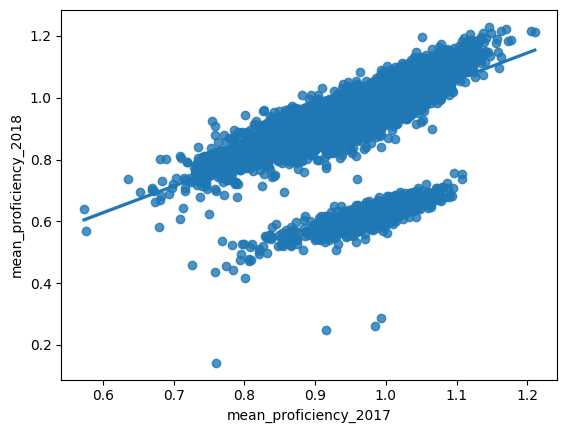

In [12]:
#Plotting 2017 and 2018 Proficiency Relationship
sns.regplot(x='mean_proficiency_2017', y='mean_proficiency_2018', data=math_df)

In [13]:
X = math_df[['mean_proficiency_2017']]
y = math_df['mean_proficiency_2018']

print(X)
print(y)

       mean_proficiency_2017
0                       0.96
1                       0.95
2                       0.99
3                       1.04
4                       0.93
...                      ...
15041                   0.94
15042                   1.08
15043                   0.96
15044                   0.97
15046                   0.91

[15046 rows x 1 columns]
0       0.92
1       0.97
2       1.01
3       1.01
4       0.91
        ... 
15041   0.97
15042   1.12
15043   0.95
15044   0.98
15046   0.94
Name: mean_proficiency_2018, Length: 15046, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [15]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [16]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.09
 R^2 =   0.23


Text(0, 0.5, 'mean_proficiency_2018')

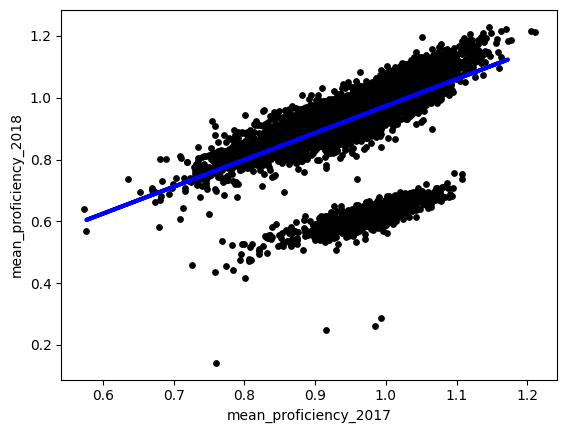

In [17]:
plt.scatter(X, y,  color='black',s=15)

plt.plot(X_test, prediction, color='blue', linewidth=3)

plt.xlabel('mean_proficiency_2017')
plt.ylabel('mean_proficiency_2018')

Reading

In [18]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "readingProficiency2017-2018.csv")
reading_df = pd.read_csv(filename, header = 0)

In [19]:
reading_df.head()

,studentId,mean_proficiency_2017,mean_proficiency_2018,studentLevel2017,studentLevel2018
0,44777,0.97,0.99,6,7
1,44783,1.01,1.00,6,7
2,44784,0.93,0.95,5,6
3,44807,1.03,1.01,6,7
4,44809,0.95,0.93,6,7


In [20]:
reading_df = reading_df.dropna()

In [21]:
reading_df.shape

(15074, 5)

<Axes: xlabel='mean_proficiency_2017', ylabel='mean_proficiency_2018'>

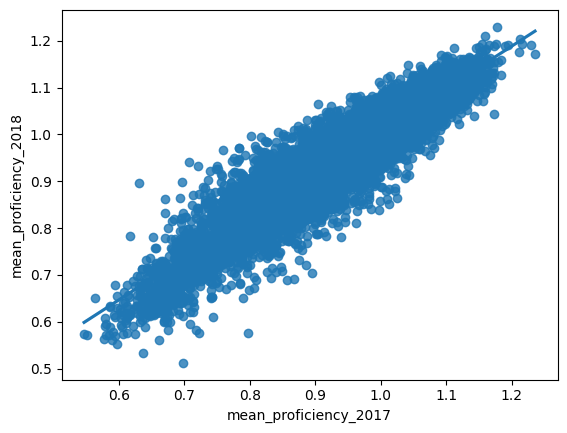

In [22]:
#Plotting 2017 and 2018 Proficiency Relationship
sns.regplot(x='mean_proficiency_2017', y='mean_proficiency_2018', data=reading_df)

In [23]:
X = reading_df[['mean_proficiency_2017']]
y = reading_df['mean_proficiency_2018']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [25]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [26]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.04
 R^2 =   0.85


Text(0, 0.5, 'mean_proficiency_2018')

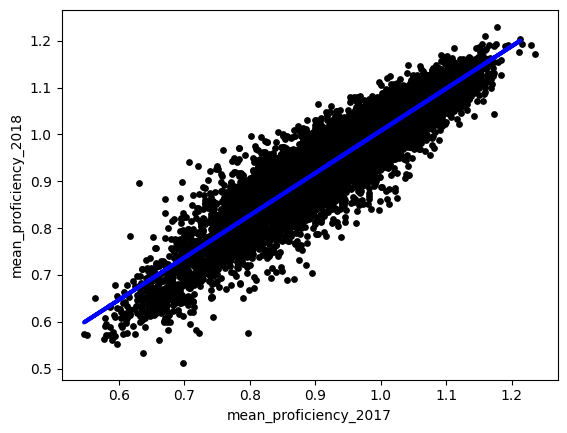

In [27]:
plt.scatter(X, y,  color='black',s=15)

plt.plot(X_test, prediction, color='blue', linewidth=3)

plt.xlabel('mean_proficiency_2017')
plt.ylabel('mean_proficiency_2018')
